# Hands-on with Qiskit: Quantum Circuits and Quantum Gates

This notebook gives you a brief introduction to programming quantum circuits and quantum gates with Qiskit.

It is recommended that you use the [Jupyter](https://jupyter.org/install) development environment to interact with quantum computers. Be sure to install the recommended extra visualization support (`'qiskit[visualization]'`).The `matplotlib` package is also useful for visualization.

To learn about quantum computing in general, visit the [Basics of quantum information course](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information) in IBM Quantum Learning.

IBM® is committed to the responsible development of quantum computing. Learn more about responsible quantum at IBM and review our responsible quantum principles in the [Responsible quantum computing and inclusive tech](https://docs.quantum.ibm.com/responsible-quantum-computing) topic.

Run a cell in by clicking on it and then pressing 'shift' + 'enter'. This is the general way to execute a code cell in a Jupyter notebook environment that you are using now. While it is running, you will see `In [*]`: in the top left of that cell. Once it finishes running, you will see a number instead of the star, which indicates how many cells you've run. 


## Install Qiskit <a id="install"></a>

Follow the [Install and set up](https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit) instructions if you haven't already.






If you prefer to follow a video guide on how to install and run Qiskit locally, watch [this video](https://www.youtube.com/watch?v=dZWz4Gs_BuI) to walk you through every step of the process.

First, check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version:

In [ ]:
from platform import python_version
print(python_version())

If you need to upgrade Python and are unsure how to do it, please refer to this guide on how to upgrade Python depending on your OS: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version).

Then, proceed to execute the next cell to [install the Qiskit SDK and the Qiskit Runtime client](https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit)

In [ ]:
### INSTALL QISKIT: Visualization (works on all environments and cloud ###
%pip install qiskit
%pip install qiskit[visualization]
%pip install qiskit-ibm-runtime

### Troubleshooting <a id="troubleshooting"></a>

If the previous cell raised an error, you can opt to install Qiskit in a virtual environment (two suggested methods follow). If you have no errors, you can ignore this cell and proceed to the next one.

Here we propose two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

## Imports

In [ ]:
# Import necessary libraries for this notebook
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from IPython.display import display, Latex

In [ ]:
# CHECK QISKIT VERSION
import qiskit
qiskit.__version__

You should have Qiskit version `>=2.0.0`


## Set up your IBM Cloud account <a id="setting-ibm-cloud"> </a>

You must set up an IBM Cloud account in order to to execute quantum circuits on real hardware.

Follow the instructions in this guide [Set up your IBM Cloud account](https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup) to complete the following steps:

1. Set up an IBM Cloud account if you do not already have one.
2. Log into or create an [IBM Quantum Platform](https://quantum.cloud.ibm.com/) account with an IBMid.
2. Access your IBM Quantum Platform dashboard, **create your API token**, and copy it to a secure location. (See first reference image below.)
3. In the code cell following the reference images, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the Instances page from the ☰ main menu and **create your instance**. If you are not part of a Network institution, choose the open plan. (See second reference image below.)
5. After the instance is created, copy its associated CRN code. (CRN stands for _Cloud Resource Names_) You may need to refresh to see the instance.
6.  In the code cell following the reference images, replace `deleteThisAndPasteYourCRNHere` with your CRN code.

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** Treat your API key as you would a secure password. See the [Cloud setup](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.
</div>

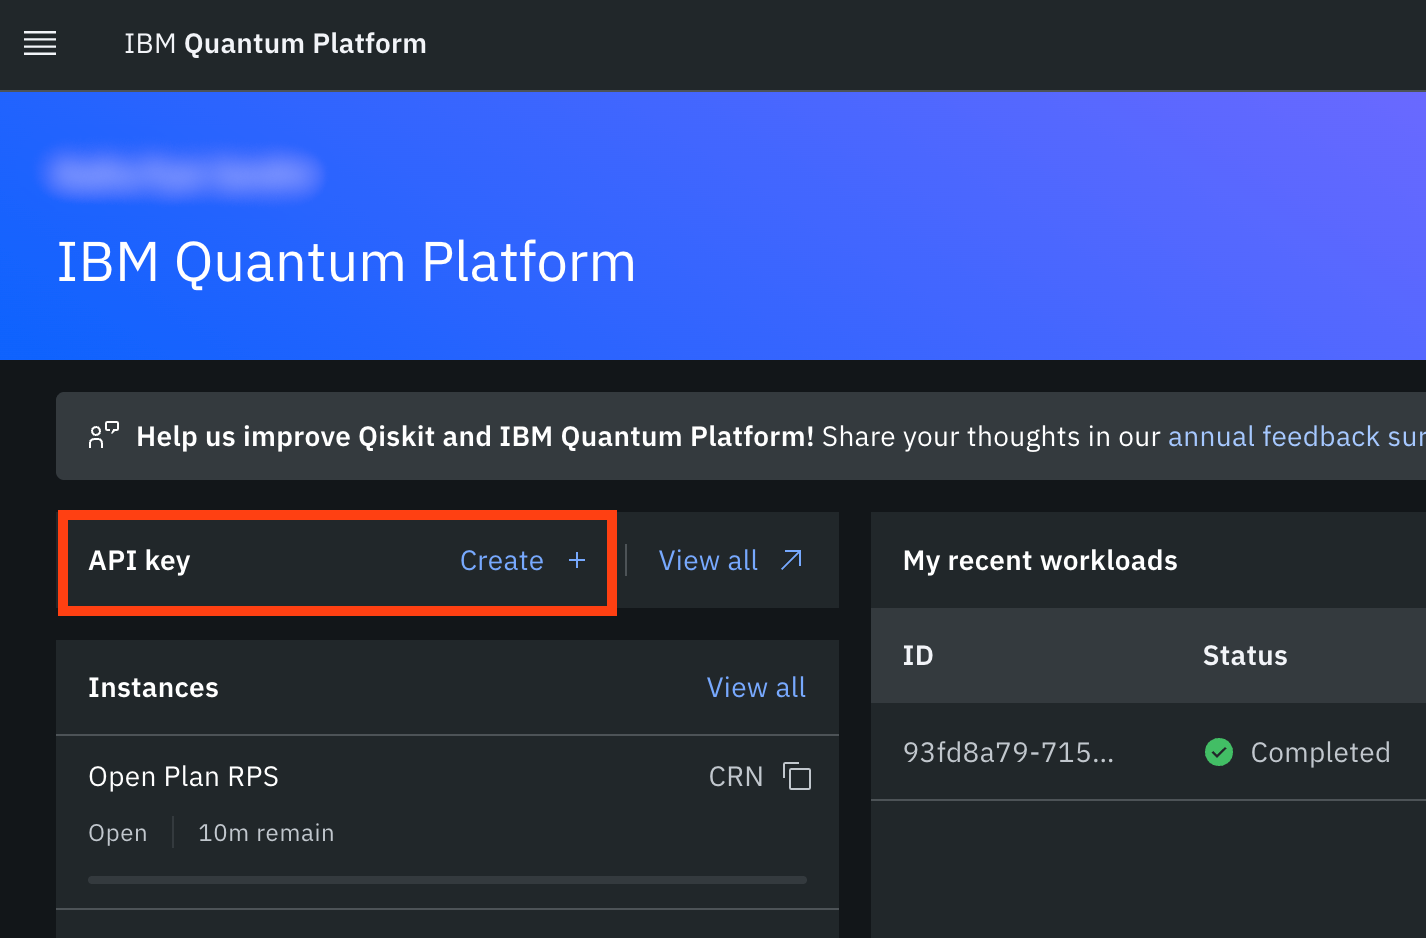

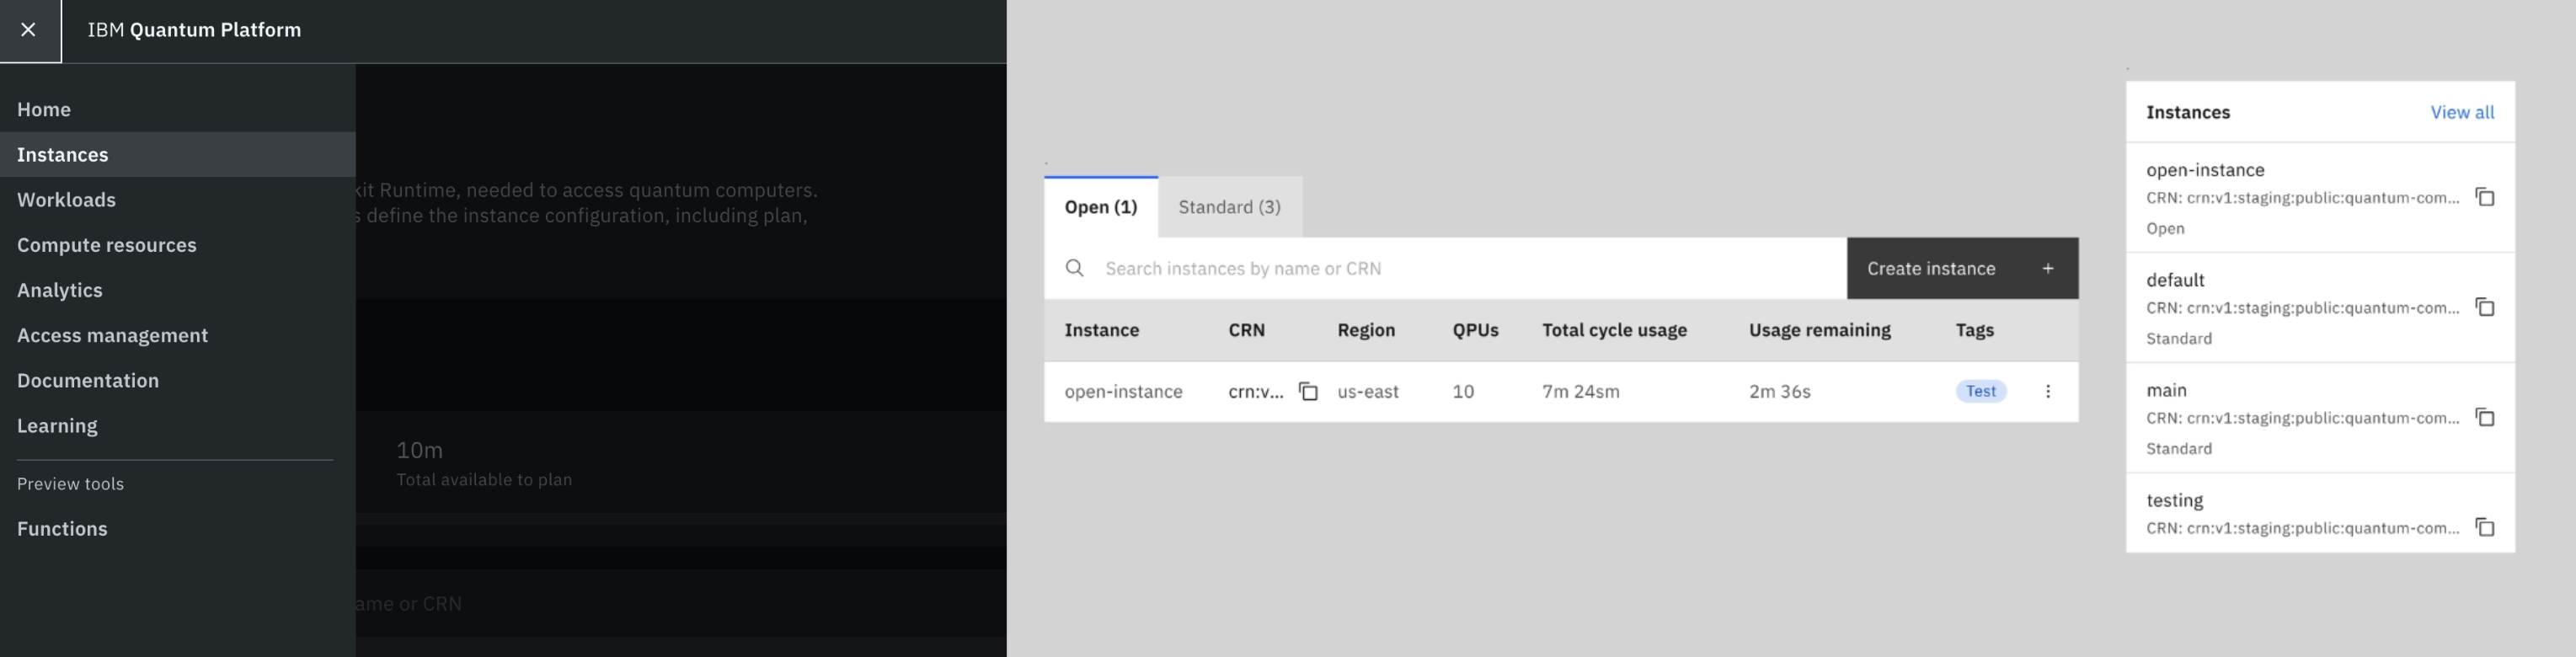

In [ ]:
# Save your API key to have access to the quantum computers

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    overwrite=True,
)

## Quantum Circuits

Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Let's see how to create a quantum circuit with Qiskit.


In [ ]:
# Simple quantum circuit with two qubits

qc = QuantumCircuit(2) # creates quantum circuit called qc with 2 qubits 
qc.draw(output='mpl') #draws the quantum circuit

In [ ]:
# Simple quantum circuit with two qubits and two classical bits

qc = QuantumCircuit(2,2) # creates quantum circuit with 2 qubits and 2 classical bits
qc.draw(output='mpl')

In [ ]:
# Quantum circuit with a Quantum Register named 'qr' that has two qubits, and a Classical Register named 'cr' with two classical bits

qreg = QuantumRegister(2,'qr') # creates a quantum register with 2 qubits, register label is 'qr'
creg = ClassicalRegister(2,'cr') # creates a classical register with 2 qubits, register label is 'cr'


qc = QuantumCircuit(qreg,creg) # creates quantum circuit with registers qreg and creg
qc.draw(output='mpl') #draws the quantum circuit

## Quantum Gates
 Now let's take a look at some of the popular quantum gates. To understand how these gates operate on quantum states, we can make use of the Bloch sphere representation of quantum states. 


 ### The Bloch Sphere

An arbitrary single qubit state can be written as combination of the basis states $\ket{0}$ and $\ket{1}$: $\ket{\psi}= a\ket{0}+b\ket{1}$

where $a,b$ are complex numbers such that $|a|^2+|b|^2=1$. These conditions allow us to map a quantum state onto a Bloch sphere, a sphere of radius 1.

This is the Bloch sphere:

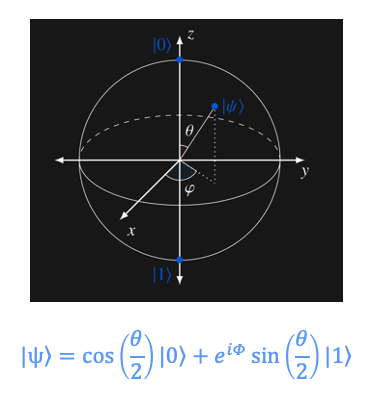

About the Bloch sphere:
- The Bloch sphere is a 3D geometric representation of a qubit's state
- Any arbitrary single-qubit state can be written as $\cos{\frac{θ}{2}}\ket{0} + e^{iφ}\sin{\frac{θ}{2}}|1⟩$, where $e^{iφ}$ is the phase
- Points (states) are defined by two angles: θ (polar) and φ (azimuthal)
- The North Pole represents $\ket{0}$
- The South Pole represents $\ket{1}$
- The Equator represents equally weighted superpositions with different phases
- The X, Y, and Z axes correspond to the Pauli operators
- Every point on the Bloch sphere's surface represents a possible pure state of a single qubit.

### X Gate
An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians.
It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

Let's apply the X gate on the $\ket{0}$ state.

In [ ]:
# Let's see the Bloch sphere visualization of the 0 state

plot_bloch_multivector([1,0]) # plots the state 0 represented as the column vector [1,0]ᵀ

In [ ]:
# Let's apply an X-gate on a |0> qubit

qc = QuantumCircuit(1) 
qc.x(0) # applies X gate on qubit 0 
qc.draw(output='mpl') 

#qc.draw() # test draw without mpl

In [ ]:
# Let's see Bloch sphere visualization

sv = Statevector(qc) # returns the statevector of the quantum circuit
plot_bloch_multivector(sv) # plots the state on the Bloch sphere

### H Gate
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the $X$-axis and $Z$-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

In [ ]:
# Let's apply an H-gate on a |0> qubit

qc = QuantumCircuit(1)
qc.h(0) # applies H gate on qubit 0
qc.draw(output='mpl')


In [ ]:
# Let's see Bloch sphere visualization

display(Latex(r'Before Hadamard Gate (the $\ket{0}$ state)'))
display(plot_bloch_multivector([1,0])) # plotting the |0> state, whose statevector is the column vector [1,0]'

display(Latex(r'After Hadamard Gate (the $\ket{+}$ state)'))
sv = Statevector(qc)
display(plot_bloch_multivector(sv))


### Z Gate
The Z gate represents a rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate', as it only operates on the phase.

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

In [ ]:
# Let's apply a Z-gate on |+>

qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.draw(output='mpl')

In [ ]:
# Let's see Bloch sphere visualization
sv = Statevector(qc)
plot_bloch_multivector(sv)

### CX Gate (CNOT Gate)
The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. 

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$



<div class="alert alert-info">

Important note: Qiskit numbers the bits in a string from right to left. The Qiskit SDK uses the LSb 0 bit numbering. When displaying or interpreting a list of $n$ bits (or qubits) as a string, bit $n−1$ is the leftmost bit, and bit $0$ is the rightmost bit. This is because we usually write numbers with the most significant digit on the left, and in Qiskit, bit $n−1$ is interpreted as the most significant bit. For more details, see the [Bit-ordering in the Qiskit SDK](https://docs.quantum.ibm.com/guides/bit-ordering) topic.

</div>


So the matrix representation of $CX$ in Qiskit would be:

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
\end{pmatrix}$

In [ ]:
# Let's apply a CX-gate on |00>

qc = QuantumCircuit(2) # creates a quantum circuit with 2 qubits 
qc.cx(0,1) # applies CNOT gate where qubit 0 is the control qubit and qubit 1 is the target qubit
qc.draw(output='mpl')


In [ ]:
#options to save the circuit figure 

#qc.draw('mpl').savefig(‘name.png’, dpi=300)
#qc.draw('mpl').savefig(‘name.svg’)

## Exercises

<div class="alert alert-success">
    
**Exercise 1** Create the first Bell state

$ |\phi^+ \rangle = \frac{1}{\sqrt 2}(|00 \rangle + |11 \rangle) $

</div>

In [ ]:
# Create a Quantum Circuit


# Apply H gate


# Apply a CX gate


# Draw the circuit



In [ ]:
# Get the statevector of the circuit


# Plot the state using Bloch sphere visualization



In [ ]:
# Plot the state using qsphere visualization
# Hint: Here's the link to the documentation https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_qsphere



<div class="alert alert-info">
    
**Answer to Exercise 1** Create the first Bell state

$ |\phi^+ \rangle = \frac{1}{\sqrt 2}(|00 \rangle + |11 \rangle) $

</div>

In [ ]:
# Create a Quantum Circuit

qc_bell1 = QuantumCircuit(2)

# Apply H gate

qc_bell1.h(0)

# Apply a CX gate

qc_bell1.cx(0,1)

# Draw the circuit

qc_bell1.draw(output='mpl')



In [ ]:
# Get the statevector of the circuit

sv_bell1 = Statevector(qc_bell1)

# Plot the state using Bloch sphere visualization

plot_bloch_multivector(sv_bell1)


The Bloch sphere isn't the best visual representation of multi-qubit states. The Qsphere, invented by IBM Quantum, is a better representation.

In [ ]:
# Plot the state using qsphere visualization

plot_state_qsphere(sv_bell1)

<div class="alert alert-success">

**Exercise 2** Create the second Bell state

$ |\phi^- \rangle = \frac{1}{\sqrt 2}(|00 \rangle - |11 \rangle) $

</div>

In [ ]:
# Create a circuit with the second Bell state






In [ ]:
# Get the statevector of the circuit


# Plot the state using qsphere visualization



<div class="alert alert-success">

**Exercise 3** Create the 3-qubit GHZ state

$ |GHZ \rangle = \frac{1}{\sqrt 2}(|000 \rangle + |111 \rangle) $

</div>

In [ ]:
# Create a circuit with 3-qubit GHZ state






In [ ]:
# Get the statevector of the circuit


# Plot the state using qsphere visualization



<div class="alert alert-success">

**Exercise 4** Create Qiskit logo state

$ |Qiskit \rangle = \frac{1}{\sqrt 2}(|0010 \rangle + |1101 \rangle) $

</div>

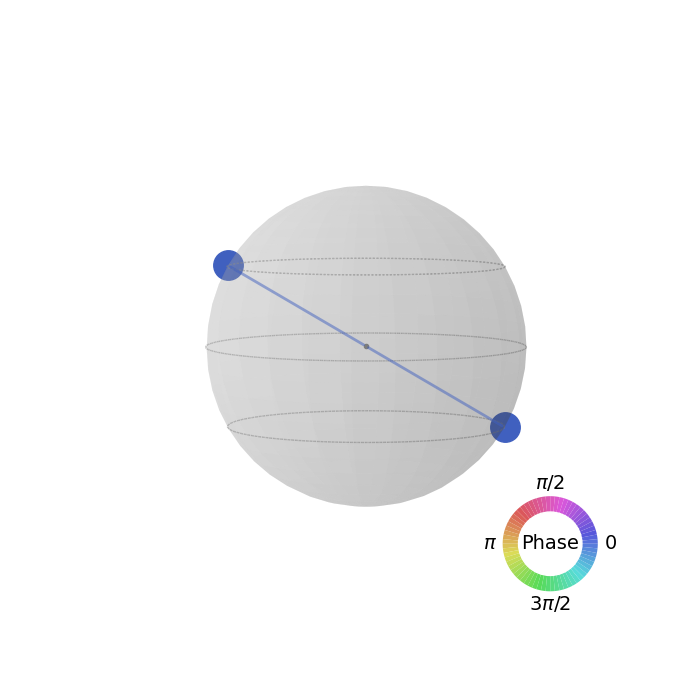

In [ ]:
# Create a circuit with the Qiskit logo state






In [ ]:
# Get the statevector of the circuit


# Plot the state using qsphere visualization



<div class="alert alert-success">

**Bonus Exercise** Create a n-qubit GHZ state

$ |GHZ_n \rangle = \frac{1}{\sqrt 2}(|000..0 \rangle + |111...1 \rangle) $

</div>

In [ ]:
# Create a function to generate a n-qubit GHZ state

def create_ghz(num_qubits):

    qc = 



    

    return qc

In [ ]:
# Use create_ghz function to generate a 6-qubit GHZ state

qc = create_ghz(6)
qc.draw()